In [20]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [26]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train/255
x_test=x_test/255

In [27]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer="sgd",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f"%test_loss)
print("Accuracy=%.3f"%test_acc)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7383 - loss: 1.0070 - val_accuracy: 0.9048 - val_loss: 0.3607
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9010 - loss: 0.3590 - val_accuracy: 0.9172 - val_loss: 0.2976
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9170 - loss: 0.2946 - val_accuracy: 0.9232 - val_loss: 0.2657
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9248 - loss: 0.2663 - val_accuracy: 0.9296 - val_loss: 0.2436
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9300 - loss: 0.2472 - val_accuracy: 0.9362 - val_loss: 0.2254
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9353 - loss: 0.2281 - val_accuracy: 0.9393 - val_loss: 0.2109
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9412 - loss: 0.2093 - val_accuracy: 0.9427 - val_loss: 0.1991
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9448 - loss: 0.1912 - 

In [17]:
n=random.randint(0,9999)

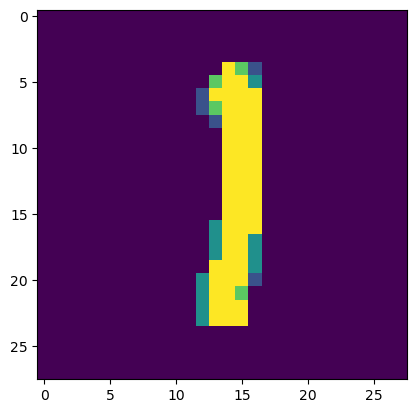

In [18]:
plt.imshow(x_test[n])
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


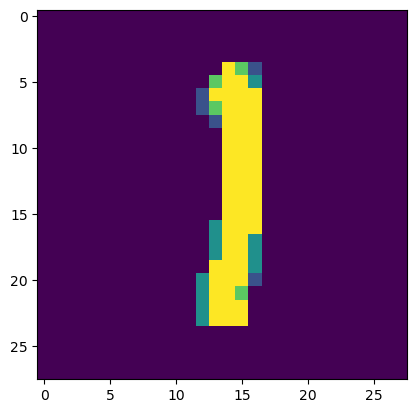

Predicted Value: [8.2395536e-07 9.6003026e-01 9.8681252e-04 1.5141187e-02 6.1849394e-05
 2.4726773e-05 1.1576679e-05 2.1254685e-02 6.9984241e-04 1.7881669e-03]


In [19]:
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()
print("Predicted Value:",predicted_value[n])

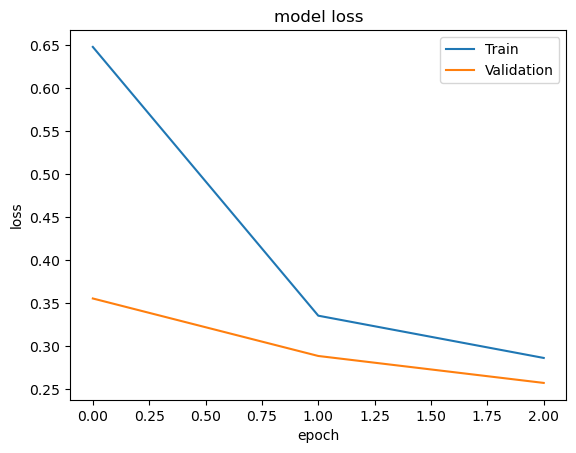

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()